# Project 4: Wrangle and Analyze Data

## Introduction
This project entails the wrangling and data analysis contained in three separated datasets all with a common origin in a Twitter dog rating platform called WeRateDogs.

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The three datasets that will be used in this project are:

    An Enhanced Twitter Archive extracted and enriched by Udacity to use in this project containing tweet data (tweet ID, timestamp, text, etc.) for over 2500+ of tweets between August 1, 2015 and August 1, 2017.

    An Image Predictions Dataset with images of the dogs and their respective breeds obtained through a neural network containing URL images and tweet_id.

    An Additional Twitter Dataset to be gathered from Twitter's API using the tweet_id contained in the Enhanced Archive.

The wrangling process comprises three stages: Gathering, Assessing and Cleaning the data. Since these are rather large files these tasks will be performed programmatically. However, where it is of benefit to help the programmatic process limited visual assessments will be made.


## Gathering

This is the first stage of data wrangling which involves simple tasks such as reading files provided directly or requesting files located in servers and also even more complex tasks like interrogating Twitter's API to obtain additional information. For each of the datasets mentioned above one of these three processes will be conducted respectively.

In [1077]:
"""Importing all the packages needed"""
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 200
import seaborn as sns
import requests

### Gathering and Loading the Enhanced Twitter Archive onto a Pandas Dataframe

This is a straightforward process that involves using the read_csv method to the file made available which is loaded automatically onto a Pandas Dataframe.


In [1078]:
"""Reading the main dataset"""
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [1079]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


### Gathering and Loading the Images Predictions Dataset onto a Pandas Data Frame
This dataset is gathered using the request library and then read with the read_csv pandas method using appropiate parameters for enconding and separator to load it onto a Pandas Data Frame.

In [1080]:
"""Reading the image file using the Requests library"""
r=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [1081]:
r.encoding

'utf-8'

In [1082]:
"""Reading and loading the Image Predictions file to a Data Frame using suitable separator and encoding"""
image_df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',sep="\t",encoding='utf-8')

In [1083]:
"""Looking at the Image Prediction dataset"""
image_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [1084]:
image_df.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


### Gathering and Loading Additional Twitter Dataset onto a Pandas Data Frame
Gathering the Additional Twitter Dataset involves more work as this data will be downloaded programmatically from the Twitter API using code based on the tweepy package that enables interrogation of the API.

This is done below. However, according to the project guidelines, the chosen path to approach this part of the project was to use the Twitter API interrogation code provided, as well as the output file tweet-json.txt. Therefore, the code runs but it fails to capture the information as a result of having skiped the steps to access the Twitter API.

In [526]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

"""Querying Twitter API for each tweet in the Twitter archive and save JSON in a text file """
"""Credentials are hidden to comply with Twitter's API terms and conditions"""

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df.tweet_id.values
len(tweet_ids)

"""Querying  Twitter's API for JSON data for each tweet ID in the Twitter archive"""

count = 0
fails_dict = {}
start = timer()

"""Saving each tweet's returned JSON as a new line in a .txt file"""

with open('tweet_json.txt', 'w') as outfile:
   
    """This loop takes 20-30 minutes to run because of Twitter's rate limit"""

    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet_json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

KeyboardInterrupt: 

### Loading additional Twitter data set onto a Pandas Data Frame
The output file tweet-json.txt then is read and loaded onto a Pandas Data Frame using the read_json method using suitable parameters to address the fact that the txt file contains strings organised in lines one for each tweet.

In [1085]:
tweet_df= pd.read_json('tweet-json.txt', lines=True)
tweet_df.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
617,2016-11-09 02:29:25+00:00,796177847564038144,796177847564038144,RT @dog_rates: This is Ruby. She just turned o...,False,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 796149732779421699, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Wed Nov 09 00:37:46 +0000 2016...,NaN,NaN,NaN
292,2017-03-04 00:21:08+00:00,837820167694528512,837820167694528512,"Here's a pupper before and after being asked ""...",False,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 837820156113911808, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,37277,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
227,2017-04-01 16:41:12+00:00,848213670039564288,848213670039564288,Jerry just apuppologized to me. He said there ...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.482121e+17,...,8834,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
2263,2015-11-20 02:47:56+00:00,667534815156183040,667534815156183040,"This is Frank (pronounced ""Fronq""). Too many b...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667534814648496128, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,866,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1760,2015-12-20 18:29:43+00:00,678643457146150913,678643457146150912,Meet Grizz. He just arrived. Couldn't wait unt...,False,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 678643449407541248, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2250,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [1086]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [1087]:
tweet_df.sample(5)     

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1640,2016-01-04 19:43:10+00:00,684097758874210310,684097758874210304,Say hello to Lupe. This is how she sleeps. 10/...,False,"[0, 90]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 684097750632411136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4515,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
589,2016-11-17 17:04:16+00:00,799297110730567681,799297110730567680,This is Jeffrey. He's quite the jokester. Take...,False,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 799297094976577539, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,11065,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2061,2015-11-30 02:52:03+00:00,671159727754231808,671159727754231808,This is Anthony. He just finished up his maste...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671159722603626496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,401,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
704,2016-10-11 00:34:48+00:00,785639753186217984,785639753186217984,This is Pinot. He's a sophisticated doggo. You...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 785639740259303424, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8735,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
382,2017-02-02 17:00:17+00:00,827199976799354881,827199976799354880,This is Charlie. He wins every game of chess h...,False,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 827199955093843969, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,11659,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing the Data
As mentioned earlier, the assesment of the data comprises two main stages: Visual assessment and Programmatical Assessment. Since the datasets are of considerable size (around 2000 records each) a programmatical assessment is the way forward. However, a visual assessment of the data driven by the intended research questions will assist directing the assessment and cleaning from the outset.

The main feature of the enhanced dataset are the dog ratings contained in it, therefore it would be of interest establish dog characteristics (breed,dog stage, name) that yield higher ratings and twitter activity. Other interesting facts to understand it would be how dog rating activity varied between 2015-2017. Then, columns like tweet_id, timestamp, rating_numerator, rating_denominator,doggo, floofer, pupper, puppo,  p1, p1_conf, p1_dog,retweet_count,favorite_count across the three datasets are key to draw insights. The tweet_id column should serve the purpose of connecting the three datasets while timestamp and created_at will provide the temporal dimension to the analysis.

In the following paragraphs detection and recording of issues are performed taking in considerations the points above and the strategic approach to sticking issues of tidiness and quality of the datasets.

### Assesing the main dataset 'twitter-archive-enhanced.csv'

In [1088]:
"""Assessing the Twitter Enhanced Dataset"""
"""Even though the assessment will be performed programatically 
it is benefitial to have an initial look at a various sample of the data before starting the assessment stage. For this sample attribute with 15 rows is ran several times """
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2249,667861340749471744,NaN,NaN,2015-11-21 00:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667861340...,9,10,a,None,None,None,None
2035,671735591348891648,NaN,NaN,2015-12-01 17:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's ready for Christmas. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671735591...,11,10,Oscar,None,None,None,None
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,None,None,None,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None


In [1089]:
"""Assessing the main data set"""
"""The sample visual assessment showed many NaN values, incorrect lower than 10 values in ratings, missing names and dog stage data in the form of incorrect None values . Therefore the info attribute should be called 
to see how they are being considered"""
df.info()
type(df.loc[378]['timestamp'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

str

In [1090]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [1091]:
"""No duplicates"""
sum(df.duplicated())

0

In [1092]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1094]:
"""Identifying incorrect values in column 'name'"""
df[df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
getting          2
actually         2
not              2
mad              2
such             1
my               1
incredibly       1
all              1
life             1
unacceptable     1
light            1
this             1
his              1
space            1
old              1
infuriating      1
officially       1
by               1
Name: name, dtype: int64

##### Description of the Enhanced Twitter Archive columns

 ***tweet_id*** is the unique twitter identification

**in_reply_to_status_id** is a twitter identifier pointing at a status reply by the original twitter user

**in_reply_to_user_id** is a twitter identifier pointing at reply by other twitter user

**timestamp** the tweet posting date

**source** is the internet path of the original tweet

**text** is the text describing the dog features and behaviours

**retweeted_status_id** is the twitter identifier of the tweet that was object of a retweet. It is accurate indicator of a retweet.

**retweeted_status_user_id** is the twitter identifier for the retweet of the status user of the original tweet. It is also an accurate indicator of a retweet.

***retweeted_status_timestamp*** the date of the retweet

***expanded_urls*** URLs of the dog rating. All of the ones accessed **were not existing pages!***

***rating_numerator*** the numerator of the dog rating. Must be a value greater than 10

***rating_denominator*** the denominator of the dog rating. Must be always 10

***name*** The name of the dog

***doggo***, ***floofer***, ***pupper****, ***puppo*** This columns are the dog stage recorded under the same name of the column if it is the case
       


A fact that immediately grabes the attention is that there are missing values recorded as None, 'a', 'the', 'an', 'very', 'one', etc. in column 'name'.

For this project the interest is focused only around the original ratings. Therefore records containing retweets will be scrapped from the data set.

There are 59 records without URLs for images. Some of them might correspond to retweets. Since this will no be kept therefore the focus will be on the remaining records without images that also will need to be scrapped.

Some records have missing values in the form of only None values in all of their columns containing the dog stage (doggo, floofer, pupper, puppo).

'rating_numerator' column show incorrect values due to poor extraction method: should all be greater or equal than '10' but many values below 10 are encountered. While 'rating_denominator' should always be '10', there are many different values between 0 and 170. However, since these should always be 10 they shouldn't attract so much cleaning attention from the analyst. For data analysis and visualization purposes the key values are 'rating_numerators'.

The dog stage data suffers from a tidiness issue. It should be under a single column.

***Quality and Tidiness issues are identified below with the 1.X and 2.X numerators respectively***

***The cleaning process will be addressed for quality issues first, subsequently for tidiness issues as good practice indicates. However, in few cases a tidiness issue could be addressed before a quality issue, since the cleaning is done for each dataset in sequence***

### Issues summary list for the main data set ('twitter-archive-enhanced.csv')

#### Quality

1.1 Incorrect values in column 'name: 'None', 'a', 'the', 'an', 'very', 'one', etc.

1.2 Many missing Dog stages values recorded as 'None'

1.3 'timestamp' and 'retweeted_timestamp' not in datetime format

1.4 Columns 'in_reply_to_status_id', 'in_reply_to_user_id' have 2278 NaN values

1.5 'rating_numerators' with decimals incorrectly extracted

1.6 'rating_numerators' with values below 10

1.7 Rows containing retweets

1.8 Columns retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp have 2175 NaN values

#### Tidiness

2.1 Dog stages should be in only one column containing the dog stage for each dog

2.2 'timestamp' and 'tweet_id' data is spread across the three datasets





### Assessing the image dataset

In [1095]:
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
443,674638615994089473,https://pbs.twimg.com/media/CVzMPh1UsAELQ_p.jpg,1,Pomeranian,0.846986,True,chow,0.142014,True,keeshond,0.002605,True
502,675870721063669760,https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg,1,golden_retriever,0.263892,True,Welsh_springer_spaniel,0.184193,True,beagle,0.182241,True
206,669926384437997569,https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg,1,Pomeranian,0.984231,True,keeshond,0.010231,True,papillon,0.002219,True
470,675113801096802304,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False
889,699088579889332224,https://pbs.twimg.com/media/CbOpWswWEAE9kvX.jpg,1,mousetrap,0.456186,False,banded_gecko,0.258677,False,common_iguana,0.061783,False
134,668484198282485761,https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg,1,standard_poodle,0.587372,True,Bedlington_terrier,0.182411,True,Afghan_hound,0.040968,True
920,701952816642965504,https://pbs.twimg.com/media/Cb3WXMUUMAIuzL8.jpg,1,toy_poodle,0.331707,True,miniature_poodle,0.272485,True,standard_poodle,0.169415,True
884,698953797952008193,https://pbs.twimg.com/media/CbMuxV5WEAAIBjy.jpg,1,Italian_greyhound,0.382378,True,redbone,0.102255,True,shower_cap,0.076834,False
1052,714141408463036416,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,1,Labrador_retriever,0.586951,True,golden_retriever,0.378812,True,redbone,0.003605,True
679,683742671509258241,https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg,1,Pembroke,0.895279,True,Cardigan,0.022385,True,cocker_spaniel,0.017045,True


In [1096]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Columns of the Images Predictions Dataset

***tweet_id*** is the unique twitter identifier

***jpg_url*** are the URLs of the dog pictures

***img_num*** is the number of pics available for the dog

***p1*** is the dog breed provided with image prediction with the highest the degree of confidence

***p1_conf*** the degree of confidence for the image prediction with the highest the degree of confidence

***p1_dog*** is a boolean variable expressing whether the image corresponds to a dog or not

***p2***, ***p2_conf***, ***p2_dog***, ***p3***, ***p3_conf***, ***p3_dog*** idem to above but for the lesser degree of image prediction confidence

In [1097]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1098]:
image_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

The Image Predictions dataset holds 2075 lines of data. One for each 'tweet_id'. There are less pictures ('jpg_url' entries) than 'tweet_id' and not all correspond to dogs which are the focus of this project. Therefore is necessary to scrap those lines without images of dogs.

A visual assessment of the three columns that show image prediction confidence along 'p1_conf', 'p2_conf' and 'p3_conf' along with columns 'p1_dog', 'p2_dog'and 'p2_dog' are informative and their values suggest a strategy to reasonable establish the actual race of the dog showed in the image, which will subsequently allocated to a unique column during the cleaning process.

### Issues summary list for the images data set 

#### Quality

1.9 Pictures of other objects or living beings than dogs

1.10 Dog breeds spelled with lower case

#### Tidiness


2.2 'tweet_id' data is spread across the three datasets

### Assesing the Additional Tweet Data Set

In [1099]:
tweet_df.head(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20562,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
6,2017-07-28 16:27:12+00:00,890971913173991426,890971913173991424,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12041,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
7,2017-07-28 00:22:40+00:00,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,56848,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
8,2017-07-27 16:25:51+00:00,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,28226,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
9,2017-07-26 15:59:51+00:00,890240255349198849,890240255349198848,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,32467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [1100]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

##### Columns of the Additional Tweets Data Set

A initial visual assessment of the Tweets Data Set obtained by interrogation the Twitter API shows several columns have many NaN values in this dataset, which is confirmed by the programmatic assessment. This makes those columns eligible for scrapping upfront. Therefore the description will only focus on those columns that will be kept. The remaining will be scrapped during the cleaning process.

***created_at*** the date that the tweets was posted

**id*** the unique twitter identifier

***retweet_count*** how many retweets the twitt received

***favorite_count*** how many "likes" the twitt received

In [1101]:
tweet_df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [1102]:
sum(tweet_df.duplicated(['id']))

0

The dataset appears not to have missing data or incorrect values or duplicated records, however there are many NaN and null values, which will be dealt with during the cleaning process.

### Issues summary list for the additional Tweets Data Set

#### Quality

1.11 Different column names 'id' and 'created_at' than the corresponding columns in df_clean dataset

1.12  The following columns have mostly NaN Values:

'in_reply_to_status_id',
'in_reply_to_status_id_str',
'in_reply_to_user_id','in_reply_to_user_id_str',
'in_reply_to_screen_name','place','geo','coordinates',
'contributors',
'possibly_sensitive',
'possibly_sensitive_appealable',
'retweeted_status',
'quoted_status_id',
'quoted_status_id_str',
'quoted_status'

#### Tidiness

2.1 Dog stages should be in only one column containing the dog stage for each dog

2.2 'timestamp' and 'tweet_id' data is spread across the three datasets

## Cleaning the Data
Before proceeding to take actions to clean the data a copy of each dataset is made. The cleaning will be performed on the copies.

In [1103]:
"""Making a copy of the datasets"""
df_clean= df.copy()
image_clean=image_df.copy()
tweet_clean=tweet_df.copy()

### Cleaning the enhanced dataset (df --->df_clean)

### Issue 1.1

#### Define
Find all incorrect values in column 'name' and turn them in None and then put Nan values in each of them

#### Code

In [1104]:
"""Identifying all incorrect values in column 'name' """
mask = df_clean.name.str.contains('^[a-z]', regex = True)
df_clean[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [1105]:
"""Changing all incorrect values in 'name' to None"""
df_clean.loc[mask,'name']='None'

In [1106]:
"""Counting how many 'None'values """
mask2 =df_clean.name.str.contains('([N][o][n][e])', regex = True)
sum(mask2.isnull())

0

In [1107]:
"""Converting all None values to NaN"""
df_clean.loc[mask2,'name']=np.nan

##### Testing

In [1108]:
df_clean.name.isnull().sum(axis = 0)

854

In [1109]:
df_clean.name.value_counts().sort_values()

Ralph        1
Birf         1
Crawford     1
Storkson     1
Swagger      1
            ..
Tucker      10
Cooper      11
Oliver      11
Lucy        11
Charlie     12
Name: name, Length: 931, dtype: int64

In [1234]:
"""'None'value is gone"""
'None' in df_clean.name
#df_clean.name.value_counts()[:15].sort_values().plot(kind='barh');

False

### Issue 1.2

#### Define
Get missing dog stages with regexr from the Twitter Additional Dataset to fill up missing values in the Twitter Enhanced Dataset.

Once this operation is done this data will be left alone to deal with again below during the cleaning of tweet_clean Data Frame (Additional Twitter Dataset)

#### Code


In [1112]:
"""Using regexr to extract dog stage doggo for each tweet when available"""
pattern = r"(?P<doggo>[d][o][g]{2}[o])"
doggo= tweet_clean['full_text'].str.extractall(pattern).droplevel(level=1)
doggo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 9 to 1202
Data columns (total 1 columns):
doggo    99 non-null object
dtypes: object(1)
memory usage: 1.5+ KB


In [1113]:
"""Using regexr to extract dog stage floofer for each tweet when available"""
pattern = r"(?P<floofer>[f][l][o]{2}[f][e][r])"
floffer = tweet_clean['full_text'].str.extractall(pattern).droplevel(level=1)
floffer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 45 to 1020
Data columns (total 1 columns):
floofer    4 non-null object
dtypes: object(1)
memory usage: 64.0+ bytes


In [1114]:
"""Using regexr to extract dog stage pupper for each tweet when available"""
pattern = r"(?P<pupper>[p][u][p]{2}[e][r])"
pupper = tweet_clean['full_text'].str.extractall(pattern).droplevel(level=1)
pupper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 28 to 2139
Data columns (total 1 columns):
pupper    280 non-null object
dtypes: object(1)
memory usage: 4.4+ KB


In [1115]:
"""Using regexr to extract dog stage pupper for each tweet when available"""
pattern = r"(?P<puppo>[p][u][p]{2}[o])"
puppo = tweet_clean['full_text'].str.extractall(pattern).droplevel(level=1)
puppo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 12 to 1081
Data columns (total 1 columns):
puppo    37 non-null object
dtypes: object(1)
memory usage: 592.0+ bytes


In [1116]:
dog_stage= pd.concat([doggo, floffer, pupper, puppo], sort=True)
dog_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 9 to 1081
Data columns (total 4 columns):
doggo      99 non-null object
floofer    4 non-null object
pupper     280 non-null object
puppo      37 non-null object
dtypes: object(4)
memory usage: 16.4+ KB


In [1117]:
df_clean['tweet_id'].count()

2356

In [1118]:
"""Get names of indexes for which simultaneously columns doggo,floofer,pupper and puppo are 'None' """
index_names = df_clean[(df_clean['doggo'] == "None") & (df_clean['floofer']== "None") & (df_clean['pupper']=="None") & (df_clean['puppo']=="None")].index
len(index_names)


1976

In [1119]:
"""How many rows are not compromised by the missing dog stage issue?"""
df_clean['tweet_id'].count()-len(index_names)

380

In [1120]:
"""Merging tweet_clean and dogstage dataframes"""
tweet_clean=tweet_clean.append(dog_stage, sort = False)

In [1121]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2774 entries, 0 to 1081
Data columns (total 35 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null float64
id_str                           2354 non-null float64
full_text                        2354 non-null object
truncated                        2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates           

### Issue 1.3

#### Define

Change 'timestamp' format to datetime

Change 'retweet_timestamp' format to datetime.

#### Code


In [1122]:
df_clean["timestamp"]=pd.to_datetime(df_clean["timestamp"])
df_clean["retweeted_status_timestamp"]=pd.to_datetime(df_clean["retweeted_status_timestamp"])

#### Testing


In [1123]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes

### Issue 1.4

#### Define

Drop columns "in_reply_to_status_id", "in_reply_to_user_id", since they only have NaN values

#### Code


In [1124]:
df_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

#### Testing


In [1125]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns, UTC](2), float64(2), int64(3), object(8)
memory usage: 276.2+ KB


### Issue 1.5

#### Define

Get rating numerators with decimals incorrectly extracted and update them with corrected values

#### Code

In [1126]:
""" Obtaining rating numerators with decimal incorrectly extracted """
ratings = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
"""Ratings series object contain all rating numerators with decimals and rating denominators (without decimals)"""
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
0    2356 non-null object
1    2356 non-null object
dtypes: object(2)
memory usage: 36.9+ KB


In [1127]:
"""Loading corrected values in the df_clean Data Frame and changing data type to float"""
df_clean.rating_numerator = ratings
df_clean.rating_numerator.astype(float)

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_numerator, Length: 2356, dtype: float64

#### Testing

In [1128]:
df_clean.rating_numerator.astype(float).describe()

count    2356.000000
mean       13.063680
std        45.839085
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

### Issue 1.6

#### Define

Capture all rating_numerators lower than 10 and add 10 to each of them asumming it was a scale error made by the person tweeting the rate.

#### Code


In [1129]:
"""Capturing all rating_numerators below 10"""
mask4 = df_clean.rating_numerator.astype(float) < 10

In [1130]:
"""There are 441 rating_numerators below 10"""
df_clean[mask4].rating_numerator.astype(float)

229     6.00
315     0.00
340     9.75
387     7.00
462     7.00
        ... 
2351    5.00
2352    6.00
2353    9.00
2354    7.00
2355    8.00
Name: rating_numerator, Length: 441, dtype: float64

In [1131]:
"""These are: """
df_clean[mask4].rating_numerator.astype(float).value_counts() 

9.00    158
8.00    102
7.00     55
5.00     35
6.00     32
3.00     19
4.00     17
2.00      9
1.00      9
9.75      2
0.00      2
9.50      1
Name: rating_numerator, dtype: int64

In [1132]:
"""Adding 10 to fix those 441 rating_numerators asumming each of them was a scale error made by the person tweeting the rate"""
df_clean.loc[mask4,'rating_numerator']= df_clean.loc[mask4,'rating_numerator'].astype(float) + 10


#### Test


In [1133]:
df_clean.loc[mask4,'rating_numerator']

229        16
315        10
340     19.75
387        17
462        17
        ...  
2351       15
2352       16
2353       19
2354       17
2355       18
Name: rating_numerator, Length: 441, dtype: object

### Issue 1.7

#### Define

Drop 22 records containing retweets

#### Code

In [1134]:
df_clean.drop((df_clean[df_clean["retweeted_status_timestamp"] == "0"]).index, inplace=True)

#### Test


In [1135]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns, UTC](2), float64(2), int64(2), object(9)
memory usage: 294.5+ KB


### Issue 1.8

#### Define

Drop columns'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'

#### Code

In [1136]:
"""Dropping columns 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'"""
df_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null object
rating_denominator    2356 non-null int64
name                  1502 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 239.3+ KB


### Issue 2.1

#### Define

Reallocate dog stages to only one column "dog_stage" and drop columns 'doggo', 'floofer', 'pupper' and 'puppo'

#### Code

In [1137]:
"""Reallocating dog stages of df_clean to one column"""
df_clean.loc[df['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
df_clean.loc[df['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
df_clean.loc[df['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
df_clean.loc[df['puppo'] == 'puppo', 'dog_stage'] = 'puppo'

"""Reallocating dog stages of tweet_clean to one column"""
tweet_clean.loc[tweet_clean['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
tweet_clean.loc[tweet_clean['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
tweet_clean.loc[tweet_clean['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
tweet_clean.loc[tweet_clean['puppo'] == 'puppo', 'dog_stage'] = 'puppo'

In [1138]:
"""Dropping the columns 'doggo', 'floofer', 'pupper' and 'puppo' of df_clean"""
df_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

"""Drop columns 'doggo','floofer','pupper','puppo'of tweet_clean"""
tweet_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace= True)


#### Test

In [1139]:
df_clean['dog_stage'].describe()


count        380
unique         4
top       pupper
freq         257
Name: dog_stage, dtype: object

In [1140]:
df_clean['dog_stage'].sample(15)

2308       NaN
2239       NaN
1751       NaN
1774       NaN
1845    pupper
54         NaN
1352       NaN
801        NaN
1583       NaN
1156     doggo
1894       NaN
1161       NaN
979        NaN
91         NaN
2350       NaN
Name: dog_stage, dtype: object

In [1141]:
tweet_clean.dog_stage.describe()

count        420
unique         4
top       pupper
freq         280
Name: dog_stage, dtype: object

In [1142]:
tweet_clean.dog_stage.sample(15)

1059       NaN
1878    pupper
724        NaN
1651    pupper
212        NaN
1049     doggo
1379       NaN
573        NaN
216        NaN
471        NaN
1788       NaN
1922       NaN
1506       NaN
1704       NaN
788     pupper
Name: dog_stage, dtype: object

### Cleaning the Images Dataset (images_df ---->images_clean)

### Issue 1.9

#### Define
Scrap all pictures of other objects or living beings than dogs

In [1143]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
31,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,0.001117,True
917,701570477911896070,https://pbs.twimg.com/media/Cbx6nz1WIAA0QSW.jpg,1,Yorkshire_terrier,0.907990,True,silky_terrier,0.076883,True,Australian_terrier,0.008473,True
293,671347597085433856,https://pbs.twimg.com/media/CVEbFDRWsAAkN_7.jpg,1,picket_fence,0.382918,False,rain_barrel,0.108809,False,plastic_bag,0.038878,False
395,673636718965334016,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,1,wombat,0.880257,False,corn,0.019421,False,pug,0.019044,True
879,698549713696649216,https://pbs.twimg.com/media/CbG_QRJXEAALVWy.jpg,1,French_bulldog,0.998544,True,Boston_bull,0.001404,True,boxer,0.000023,True


In [1144]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Code

In [1145]:
"""Separate three image_clean in different dataframes and keep just those with True in p*_dog"""
p1_dog=image_clean[image_clean.loc[:,'p1_dog']==1]
p2_dog=image_clean[image_clean.loc[:,'p2_dog']==1]
p3_dog=image_clean[image_clean.loc[:,'p3_dog']==1]


#### Test

In [1146]:
p1_dog.info()
p2_dog.info()
p3_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1532 non-null int64
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 124.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1553 non-null int64
jpg_url     1553 non-null object
img_num     1553 non-null int64
p1          1553 non-null object
p1_conf     1553 non-null float64
p1_dog      1553 non-null bool
p2          1553 non-null object
p2_conf     1553 non-null float64
p2_dog      1553 non-null bool
p3          1553 non-null obj

### Issue 2.1

#### Define

Allocate the dog breed to a single column 'dog_breed'

In [1147]:
"""Create a new column with the dog breed"""
"""And concatenate to rebuilt something like the orginal image_clean dataset but only dogs"""
p1_dog.loc[:,'dog_breed']= p1_dog['p1']
p2_dog.loc[:,'dog_breed']= p2_dog['p2']
p3_dog.loc[:,'dog_breed']= p3_dog['p3']
image_clean = pd.concat([p1_dog,p2_dog,p3_dog])

image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4584 entries, 0 to 2073
Data columns (total 13 columns):
tweet_id     4584 non-null int64
jpg_url      4584 non-null object
img_num      4584 non-null int64
p1           4584 non-null object
p1_conf      4584 non-null float64
p1_dog       4584 non-null bool
p2           4584 non-null object
p2_conf      4584 non-null float64
p2_dog       4584 non-null bool
p3           4584 non-null object
p3_conf      4584 non-null float64
p3_dog       4584 non-null bool
dog_breed    4584 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 407.4+ KB


In [1148]:
"""Drop duplicates created in excess by manipulating the dataset"""
image_clean.drop_duplicates(['tweet_id','jpg_url','img_num','p1','p2','p3'], inplace=True)
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2026
Data columns (total 13 columns):
tweet_id     1751 non-null int64
jpg_url      1751 non-null object
img_num      1751 non-null int64
p1           1751 non-null object
p1_conf      1751 non-null float64
p1_dog       1751 non-null bool
p2           1751 non-null object
p2_conf      1751 non-null float64
p2_dog       1751 non-null bool
p3           1751 non-null object
p3_conf      1751 non-null float64
p3_dog       1751 non-null bool
dog_breed    1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 155.6+ KB


In [1149]:
"""Drop unnecessary columns since the cleaning using those columns is done"""
image_clean.drop(columns = ['p1','p2','p3','p1_dog', 'p2_dog', 'p3_dog', 'p1_conf','p2_conf','p3_conf'], inplace=True)

#### Testing

In [1150]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,dog_breed
876,698262614669991936,https://pbs.twimg.com/media/CbC6JL_WEAI_PhH.jpg,1,Italian_greyhound
1861,842535590457499648,https://pbs.twimg.com/media/C7FJpgVW4AIDzi6.jpg,1,Pembroke
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever
1652,809808892968534016,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever
1754,824775126675836928,https://pbs.twimg.com/media/C3Iwlr0WYAARVh4.jpg,1,Border_terrier


### Issue 1.10

#### Define

Capitalize dog breed

#### Code

In [1151]:
image_clean['dog_breed']= image_clean['dog_breed'].str.capitalize()

#### Testing

In [1152]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,dog_breed
803,691483041324204033,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,1,Bloodhound
1631,805520635690676224,https://pbs.twimg.com/media/Cy3IvdZXgAUoEaj.jpg,1,Malinois
59,667119796878725120,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,Pembroke
370,672975131468300288,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,1,Pug
1206,742150209887731712,https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg,1,French_bulldog


In [1153]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2026
Data columns (total 4 columns):
tweet_id     1751 non-null int64
jpg_url      1751 non-null object
img_num      1751 non-null int64
dog_breed    1751 non-null object
dtypes: int64(2), object(2)
memory usage: 68.4+ KB


### Cleaning the Twitter Additional Dataset (tweet_df ---->tweet_clean)

### Issue 1.11

#### Define

Change column name from 'id' to 'tweet_id'

Change column name of 'created_at' to 'timestamp'


#### Code

In [1154]:
tweet_clean= tweet_clean.rename(columns = {'id':'tweet_id','created_at':'timestamp'})

#### Testing

In [1155]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2774 entries, 0 to 1081
Data columns (total 32 columns):
timestamp                        2354 non-null datetime64[ns, UTC]
tweet_id                         2354 non-null float64
id_str                           2354 non-null float64
full_text                        2354 non-null object
truncated                        2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates           

### Issue 1.12

#### Define

Drop columns with NaN values and null values

#### Code

In [1156]:
tweet_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','place','geo','coordinates','contributors','possibly_sensitive','possibly_sensitive_appealable','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status'], inplace=True)

#### Testing

In [1157]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2774 entries, 0 to 1081
Data columns (total 17 columns):
timestamp             2354 non-null datetime64[ns, UTC]
tweet_id              2354 non-null float64
id_str                2354 non-null float64
full_text             2354 non-null object
truncated             2354 non-null object
display_text_range    2354 non-null object
entities              2354 non-null object
extended_entities     2073 non-null object
source                2354 non-null object
user                  2354 non-null object
is_quote_status       2354 non-null object
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
favorited             2354 non-null object
retweeted             2354 non-null object
lang                  2354 non-null object
dog_stage             420 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), object(12)
memory usage: 390.1+ KB


## Merging Datasets
Once the cleaning process is finished the dataframes are merged. Firstly, df_clean and tweet_clean are merged using their overlapping columns. Subsequently this merged data frame is merged with the image predictions dataset containing dog pictures and races to obtain the 'twitter_archive_master' data frame which is then written to the CSV file twitter_archive_master.csv'. This resolves the second tidiness issue found.

### Issue 2.2

#### Define

Merge datasets to solve the issue of common data spread across three datasets.

#### Code

In [1158]:
"""Testing that datasets have common columns"""
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2774 entries, 0 to 1081
Data columns (total 17 columns):
timestamp             2354 non-null datetime64[ns, UTC]
tweet_id              2354 non-null float64
id_str                2354 non-null float64
full_text             2354 non-null object
truncated             2354 non-null object
display_text_range    2354 non-null object
entities              2354 non-null object
extended_entities     2073 non-null object
source                2354 non-null object
user                  2354 non-null object
is_quote_status       2354 non-null object
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
favorited             2354 non-null object
retweeted             2354 non-null object
lang                  2354 non-null object
dog_stage             420 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), object(12)
memory usage: 390.1+ KB


In [1159]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null object
rating_denominator    2356 non-null int64
name                  1502 non-null object
dog_stage             380 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 184.1+ KB


In [1160]:
merged= df_clean.merge(tweet_clean)

In [1161]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 0 to 1263
Data columns (total 22 columns):
tweet_id              1264 non-null int64
timestamp             1264 non-null datetime64[ns, UTC]
source                1264 non-null object
text                  1264 non-null object
expanded_urls         1232 non-null object
rating_numerator      1264 non-null object
rating_denominator    1264 non-null int64
name                  812 non-null object
dog_stage             0 non-null object
id_str                1264 non-null float64
full_text             1264 non-null object
truncated             1264 non-null object
display_text_range    1264 non-null object
entities              1264 non-null object
extended_entities     1137 non-null object
user                  1264 non-null object
is_quote_status       1264 non-null object
retweet_count         1264 non-null float64
favorite_count        1264 non-null float64
favorited             1264 non-null object
retweeted             1

In [1162]:
"""Merging with the image dataset"""
image_clean.info()
twitter_archive_master= merged.merge(image_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2026
Data columns (total 4 columns):
tweet_id     1751 non-null int64
jpg_url      1751 non-null object
img_num      1751 non-null int64
dog_breed    1751 non-null object
dtypes: int64(2), object(2)
memory usage: 68.4+ KB


In [1163]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 961
Data columns (total 25 columns):
tweet_id              962 non-null int64
timestamp             962 non-null datetime64[ns, UTC]
source                962 non-null object
text                  962 non-null object
expanded_urls         962 non-null object
rating_numerator      962 non-null object
rating_denominator    962 non-null int64
name                  680 non-null object
dog_stage             0 non-null object
id_str                962 non-null float64
full_text             962 non-null object
truncated             962 non-null object
display_text_range    962 non-null object
entities              962 non-null object
extended_entities     962 non-null object
user                  962 non-null object
is_quote_status       962 non-null object
retweet_count         962 non-null float64
favorite_count        962 non-null float64
favorited             962 non-null object
retweeted             962 non-null object
l

In [1164]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id_str,...,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,jpg_url,img_num,dog_breed
899,668190681446379520,2015-11-21 22:14:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Skittles. I would kidnap Skittles. Pin...,https://twitter.com/dog_rates/status/668190681...,12,10,Skittles,NaN,6.681907e+17,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,210.0,696.0,False,False,en,https://pbs.twimg.com/media/CUXj4SgXAAETlu6.jpg,1,Blenheim_spaniel
231,792883833364439040,2016-10-31 00:20:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She's rather h*ckin hype for H...,https://twitter.com/dog_rates/status/792883833...,12,10,Bailey,NaN,7.928838e+17,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4964.0,12666.0,False,False,en,https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg,3,Standard_poodle
617,686730991906516992,2016-01-12 02:06:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I just love this picture. 12/10 lovely af http...,https://twitter.com/dog_rates/status/686730991...,12,10,NaN,NaN,6.867310e+17,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,1350.0,4543.0,False,False,en,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,1,Tibetan_mastiff
385,746369468511756288,2016-06-24 15:48:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,https://twitter.com/dog_rates/status/746369468...,19,10,NaN,NaN,7.463695e+17,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,1854.0,6637.0,False,False,en,https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg,1,German_shepherd
39,877201837425926144,2017-06-20 16:29:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Nelly. He graduated with his dogtorate...,https://twitter.com/dog_rates/status/877201837...,12,10,Nelly,NaN,8.772018e+17,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,5880.0,27755.0,False,False,en,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,Pembroke


In [1165]:
twitter_archive_master['retweeted'].value_counts()

False    962
Name: retweeted, dtype: int64

In [1166]:
"""Dropping column 'dog_stage' since it does not contain values (due to a no overlapping values) """
twitter_archive_master= twitter_archive_master.drop(columns=['dog_stage'])

"""Dropping column 'retweeted' since it only contains False values """
twitter_archive_master= twitter_archive_master.drop(columns=['retweeted'])


#### Testing

In [1167]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 961
Data columns (total 23 columns):
tweet_id              962 non-null int64
timestamp             962 non-null datetime64[ns, UTC]
source                962 non-null object
text                  962 non-null object
expanded_urls         962 non-null object
rating_numerator      962 non-null object
rating_denominator    962 non-null int64
name                  680 non-null object
id_str                962 non-null float64
full_text             962 non-null object
truncated             962 non-null object
display_text_range    962 non-null object
entities              962 non-null object
extended_entities     962 non-null object
user                  962 non-null object
is_quote_status       962 non-null object
retweet_count         962 non-null float64
favorite_count        962 non-null float64
favorited             962 non-null object
lang                  962 non-null object
jpg_url               962 non-null object

In [1168]:
"""Writing the dataframe to a CSV file"""
twitter_archive_master.to_csv(r'/Users/manuelalbornoz/Google Drive/Talento Digital/Nanodegree Course Data Analytics Fundamentals/Project 4 Data Wrangling/twitter_archive_master.csv', index=False)

## Analysis and Visualizations
In this section insights and visualizations from the cleaned dataset are produced. The standard walk for data analysis starts with a description of the dataset statistics through the describe attribute and the scatter_matrix plotting.

In [1169]:
twitter_archive_master.describe()

,tweet_id,rating_denominator,id_str,retweet_count,favorite_count,img_num
count,9.620000e+02,962.000000,9.620000e+02,962.000000,962.000000,962.000000
mean,7.375341e+17,10.570686,7.375341e+17,2801.415800,8300.566528,1.185031
std,6.811327e+16,7.562414,6.811327e+16,4545.420858,11306.461977,0.538878
min,6.660293e+17,2.000000,6.660293e+17,16.000000,0.000000,1.000000
25%,6.753565e+17,10.000000,6.753565e+17,577.000000,1502.000000,1.000000
50%,7.113353e+17,10.000000,7.113353e+17,1378.000000,3824.500000,1.000000
75%,7.904331e+17,10.000000,7.904331e+17,3391.500000,10589.250000,1.000000
max,8.918152e+17,150.000000,8.918152e+17,56625.000000,107015.000000,4.000000


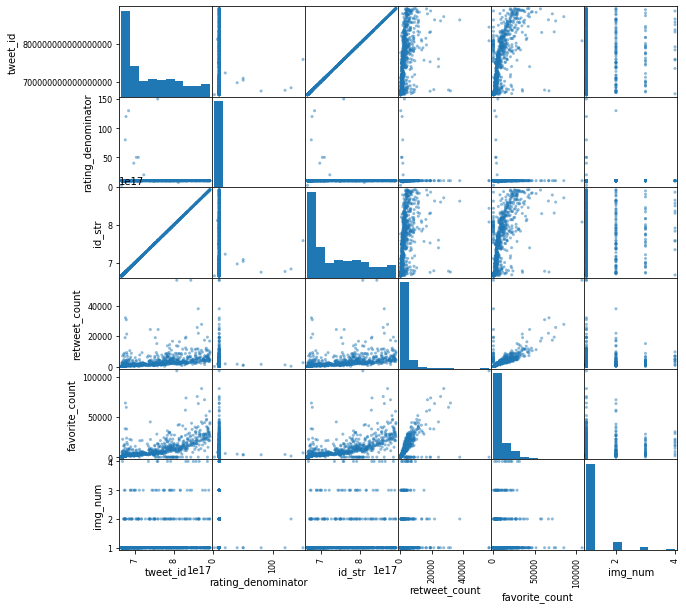

In [1170]:
pd.plotting.scatter_matrix(twitter_archive_master, figsize = (10,10));

### Insights

The scatter matrix visualization shows no correlations and suggests that 'tweet_id' and 'id_str' contain exactly the same data. However, a more important feature is the distribution of 'tweet_id' skewed to the right which suggest that users decreased the use of the WeRateDogs twitter platform considerably over the two year period from 2015 to 2017. This decrease in twitter is also true for the number of images of dogs uploaded.

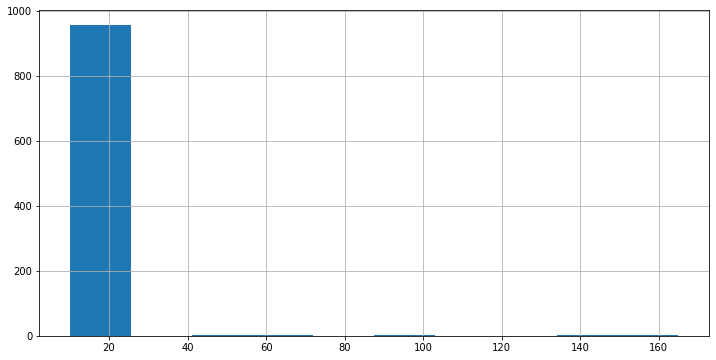

In [1321]:
"""Looking closer to ratings_numerator distribution """
twitter_archive_master['rating_numerator'].astype(float).hist(figsize= (12,6));

In [1222]:
"""Calculating the rating_numerator mean"""
twitter_archive_master["rating_numerator"] = twitter_archive_master['rating_numerator'].astype(float)
twitter_archive_master['rating_numerator'].mean()

13.081340956340956

Most ratings are in the 0 to 24 range with few outliers which shows that despite the unusual rating system the dog fans take it very seriously, with a reasonable mean around 13.1 i.e. a WeRateDogs rating of 13.1/10.

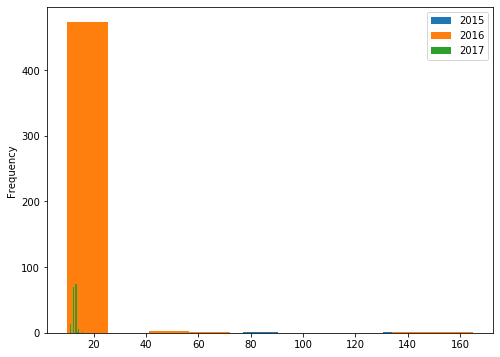

In [1326]:
"""Investigating the rating activity over the 2015-2017 period"""
twitter_archive_master['year']= twitter_archive_master['timestamp'].dt.year
twitter_archive_master.groupby(['year'])['rating_numerator'].plot(kind='hist', legend=True, figsize = (8,6));

Most 2016 dog ratings and rating numerators available are centered around the media for dog ratings of 13.1, while most of 2017 and 2015 ratings are located below it. The fact that there are fewer ratings for 2015 and 2017 than for 2016 is consistent with the fact that the data represents just portions of each years 2015 and 2017. One would be tempted to assert that WeRateDogs Twitter platform was more popular in 2016 than in the previous and the subsequent year, however must be bear in mind that many tweets did not made it to the master dataset because of the merging act. Therefore undermining a sharp conclusion on this.

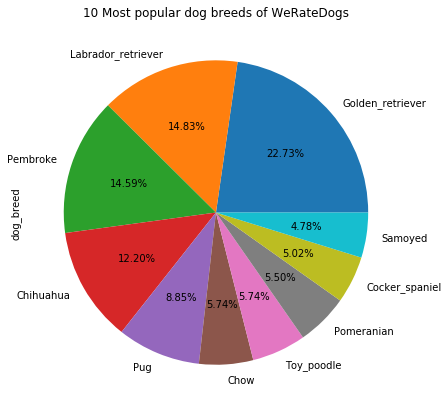

In [1327]:
"""Investigating dog breeds and how they attract more or less twitter activity"""
(twitter_archive_master['dog_breed'].value_counts()[:10]).plot(kind='pie',figsize = (7,7),autopct="%.2f%%",title = '10 Most popular dog breeds of WeRateDogs' );


Golden Retriever, Labrador Retriever and Pembroke are the dog breeds that generated the most activity in the Twitter dog rating platform. Together they account for 52% of tweets.

In [1319]:
"""Obtaining pics of the dog breed that generates more WeRateDogs twitter activity"""
twitter_archive_master.groupby(['dog_breed'])['jpg_url'].value_counts().loc['Golden_retriever'][:8]

jpg_url
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg                                            2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg                                            2
https://pbs.twimg.com/media/C-TIEwMW0AEjb55.jpg                                            1
Name: jpg_url, dtype: int64

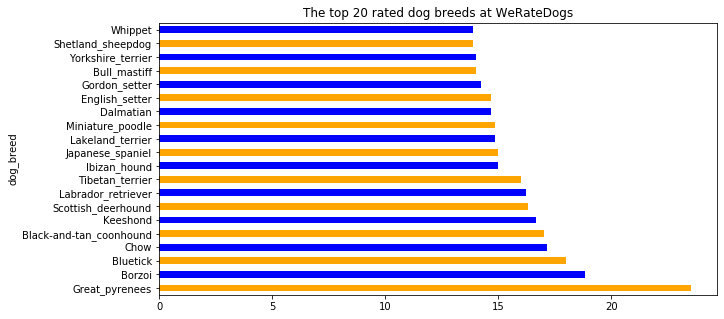

In [1254]:
twitter_archive_master.groupby(['dog_breed'])['rating_numerator'].mean().sort_values(ascending=False)[:20].plot(kind='barh', figsize=(10,5),color=['orange','blue'],title= 'The top 20 rated dog breeds at WeRateDogs');

The top three rated dog breeds were Great Pyrenees, Borzoi and Bluetick receiving all three ratings above 18/10. While 11 of the remaining best rated dog races grabbed ratings just above the mean of 13.1/10 and almost a third of the top 20 achieved ratings between 17/10-17.5/10.

In [1312]:
"""Obtaining dog pics of the top three breeds"""
twitter_archive_master.groupby(['dog_breed'])['jpg_url'].value_counts().loc['Great_pyrenees']

jpg_url
https://pbs.twimg.com/media/C3XvqILXUAU2nnT.jpg    1
https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg    1
https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg    1
https://pbs.twimg.com/media/CqqaPjqWIAAOyNL.jpg    1
Name: jpg_url, dtype: int64

In [1313]:
"""Obtaining dog pics of the top three breeds"""
twitter_archive_master.groupby(['dog_breed'])['jpg_url'].value_counts().loc['Borzoi']

jpg_url
https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg    1
https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg    1
https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg    1
https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg    1
https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg    1
https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg    1
Name: jpg_url, dtype: int64

In [1314]:
"""Obtaining dog pics of the top three breeds"""
twitter_archive_master.groupby(['dog_breed'])['jpg_url'].value_counts().loc['Bluetick']

jpg_url
https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg    1
Name: jpg_url, dtype: int64

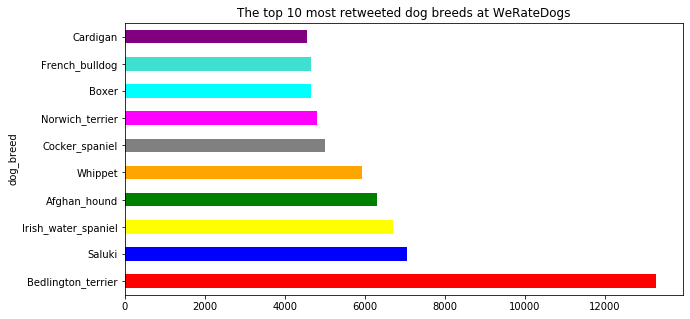

In [1255]:
"""Most retweeted dog breeds"""
twitter_archive_master.groupby(['dog_breed'])['retweet_count'].mean().sort_values(ascending=False)[:10].plot(kind='barh', figsize=(10,5),color=['red','blue', 'yellow', 'green', 'orange', 'grey','magenta', 'cyan','turquoise','purple'],title= 'The top 10 most retweeted dog breeds at WeRateDogs');

The Bedlington Terrier breed is by far the most retweeted breed of all surpassing the remaining dog breeds by 86%.

In [1317]:
"""Obtaining pics of the top retweeed dog breed of WeRateDogs"""
twitter_archive_master.groupby(['dog_breed'])['jpg_url'].value_counts().loc['Bedlington_terrier']

jpg_url
https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg    1
https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg                                            1
https://pbs.twimg.com/media/C_EyeKuXkAAdxY-.jpg                                            1
Name: jpg_url, dtype: int64

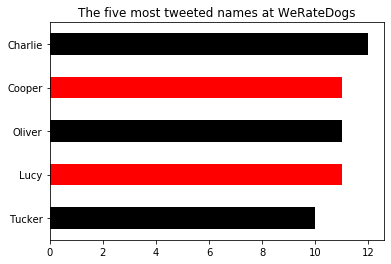

In [1257]:
"""The 5 top tweeted dog names at WeRateDogs"""
df_clean.name.value_counts()[:5].sort_values().plot(kind='barh',color=['black','red'], title= "The five most tweeted names at WeRateDogs");

In [1320]:
"""Obtaining pics of dogs named Charlie"""
twitter_archive_master.groupby(['name'])['jpg_url'].value_counts().loc['Charlie']


jpg_url
https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg    1
https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg    1
https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg    1
Name: jpg_url, dtype: int64